# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [237]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel.widgets as pnw
from pathlib import Path
from dotenv import load_dotenv
from bokeh.resources import INLINE

%matplotlib inline

In [238]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox")

## Load Data

In [239]:
# Read the census data into a Pandas DataFrame
file_path = Path("C:/Users/Endalkachew Desta/Downloads/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [240]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_units_per_year = sfo_data['housing_units'].groupby('year').mean()
mean_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

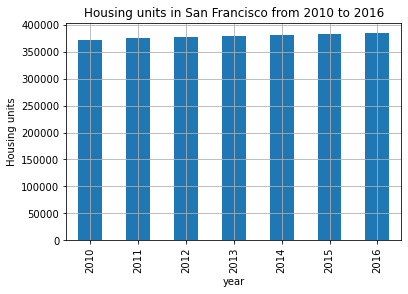

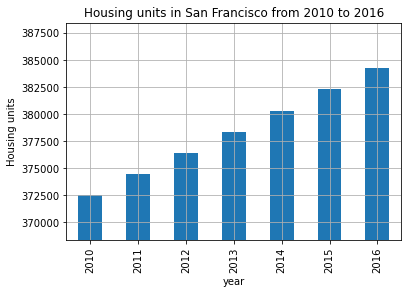

In [241]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
fig_housing_units1 = plt.figure()
avg_housing_units = mean_units_per_year.plot(
    title='Housing units in San Francisco from 2010 to 2016', kind='bar',
    grid=True,xlabel = 'year', ylabel = 'Housing units',
)

avg_housing_units
plt.show(block=False)
plt.close(fig_housing_units1)
avg_housing_units.get_figure().savefig('Unscaled data.png',bbox_inches='tight')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
fig_housing_units2 = plt.figure()
std_units_per_year = mean_units_per_year.std()
min_units_per_year = (mean_units_per_year.min()-std_units_per_year)
max_units_per_year = mean_units_per_year.max()+std_units_per_year

avg_housing_units_ylim = mean_units_per_year.plot( ylim=(min_units_per_year,max_units_per_year),
    title='Housing units in San Francisco from 2010 to 2016', kind='bar',
    grid=True, xlabel = 'year', ylabel = 'Housing units',
)

plt.show(block=False)

plt.close(fig_housing_units2)

avg_housing_units_ylim.get_figure().savefig('Scaled data.png',bbox_inches='tight')

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [242]:
# Calculate the average gross rent and average sale price per square foot
avg_rent_per_sqft_per_year = sfo_data[['sale_price_sqr_foot','gross_rent']].groupby('year').mean()
avg_rent_per_sqft_per_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


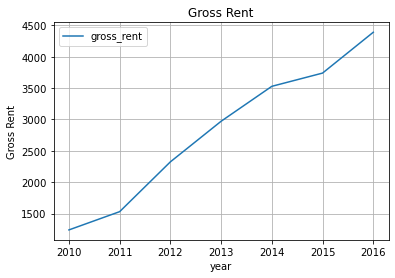

In [243]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_rent_per_year = avg_rent_per_sqft_per_year.plot(
    y='gross_rent',kind='line',grid=True,title='Gross Rent',xlabel='year',ylabel='Gross Rent')
avg_rent_per_year

avg_rent_per_year.get_figure().savefig('Avg Gross rent per year.png',bbox_inches='tight')

### Average Sales Price per Year

In [248]:
# Plot the Average Sales Price per Year as a line chart
Average_Sales_Price_per_Year = sfo_data[['sale_price_sqr_foot']].groupby('year').mean()
Average_Sales_Price_plot = Average_Sales_Price_per_Year.hvplot.line(
    x='year',y='sale_price_sqr_foot',grid=True, title='Average sale price per year')
Average_Sales_Price_plot

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [113]:
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_sale_price_per_year = sfo_data.groupby(['year','neighborhood']).mean()
avg_sale_price_per_year

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [115]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
avg_sale_price_per_year.hvplot.line(
    x='year',y='sale_price_sqr_foot',grid=True,
    groupby='neighborhood',title='Avg-price-neighborhood'
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [139]:
# Getting the data from the top 10 expensive neighborhoods
df = pd.DataFrame(sfo_data)
top_ten_expensive_neighborhood = df.groupby('neighborhood').mean().nlargest(10, 'sale_price_sqr_foot')
top_ten_expensive_neighborhood

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [144]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten_expensive_neighborhood.hvplot.bar(
    x='neighborhood',y='sale_price_sqr_foot',rot=75,
    xlabel='Neighborhoods',ylabel='Avg sale price per sqft',
    title='Top 10 Most Expensive Neighborhoods',grid=True
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

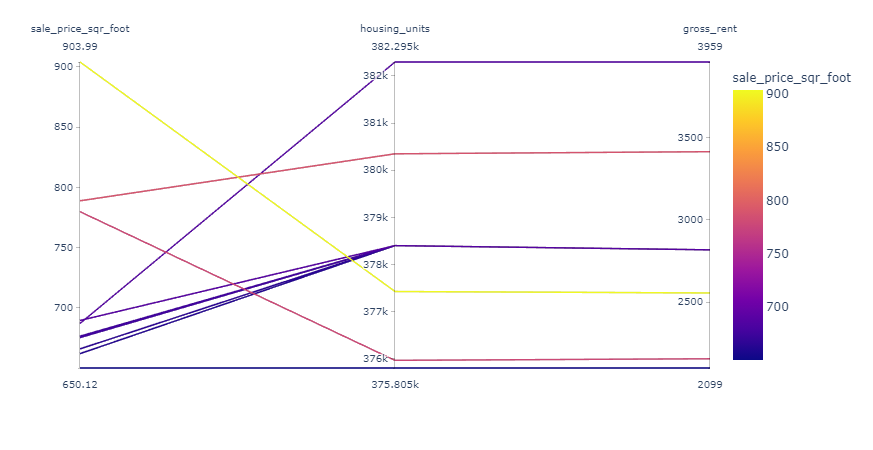

In [155]:
# Parallel Coordinates Plot
df2 = pd.DataFrame(top_ten_expensive_neighborhood)
cols = ['sale_price_sqr_foot','housing_units','gross_rent']
px.parallel_coordinates(df2, color='sale_price_sqr_foot',dimensions=cols,)

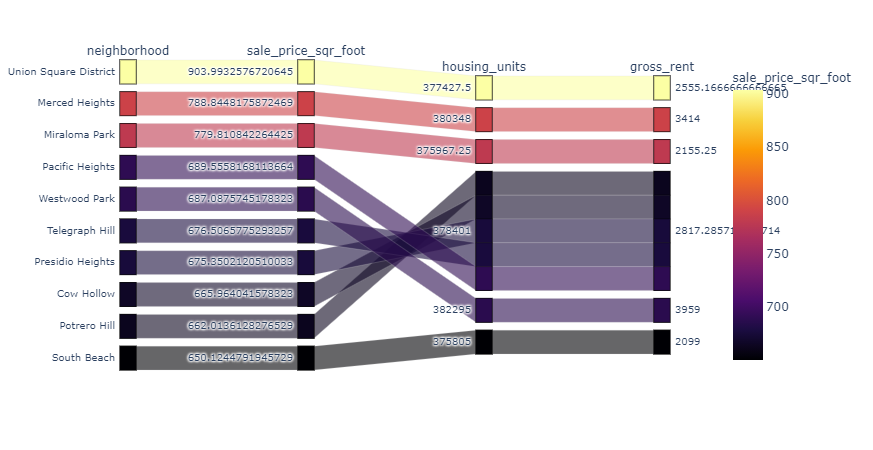

In [160]:
# Parallel Categories Plot
df3 = df2.reset_index()

px.parallel_categories(
    df3,
    dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,

)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [195]:
# Set the Mapbox API
px.set_mapbox_access_token(mapbox_token)

In [196]:
# Load neighborhoods coordinates data
file_path = Path("C:/Users/Endalkachew Desta/Downloads/Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_location = pd.DataFrame(df_neighborhood_locations)
df_neighborhood_location.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [197]:
# Calculate the mean values for each neighborhood
neighborhood_mean = df.groupby('neighborhood').mean().reset_index()
neighborhoods_mean = pd.DataFrame(neighborhood_mean)
neighborhoods_mean.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [198]:
# Join the average values with the neighborhood locations
joined_data = pd.concat([df_neighborhood_location,neighborhoods_mean],join='outer',axis=1).drop(columns=['neighborhood'])
joined_data.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

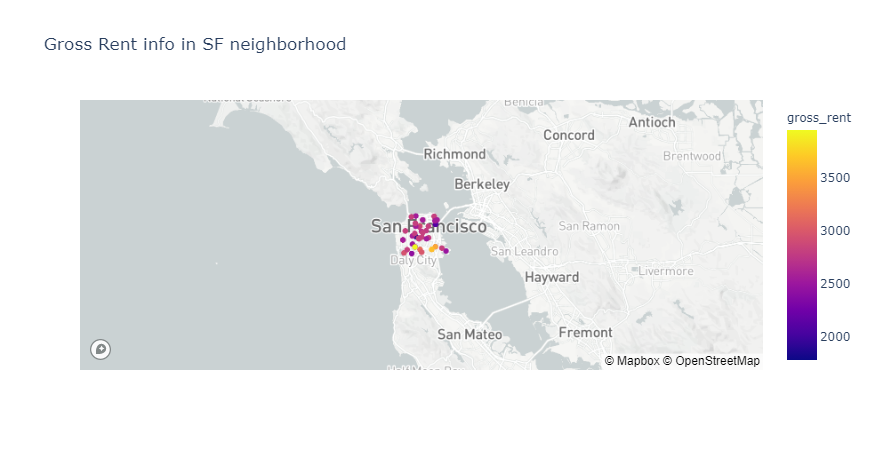

In [218]:
# Create a scatter mapbox to analyze gross rent distribution info
sf_gross_rent = px.scatter_mapbox(
    joined_data,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    hover_name="Neighborhood",title="Gross Rent info in SF neighborhood"
   # hover_data="sale_price_sqr_foot"
)
sf_gross_rent.show()

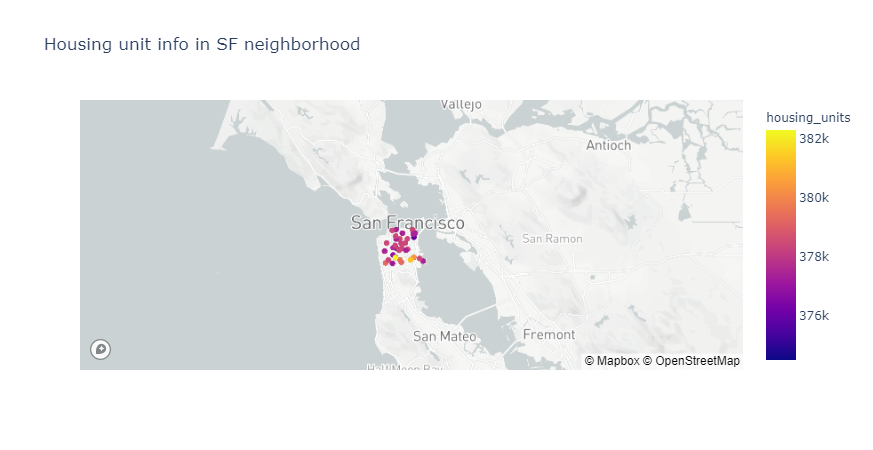

In [216]:
# Create a scatter mapbox to analyze housing units info of the neighbourhood
housing_units = px.scatter_mapbox(
    joined_data,
    lat="Lat",
    lon="Lon",
    color="housing_units",
    hover_name="Neighborhood",title="Housing unit info in SF neighborhood"
)
housing_units.show()

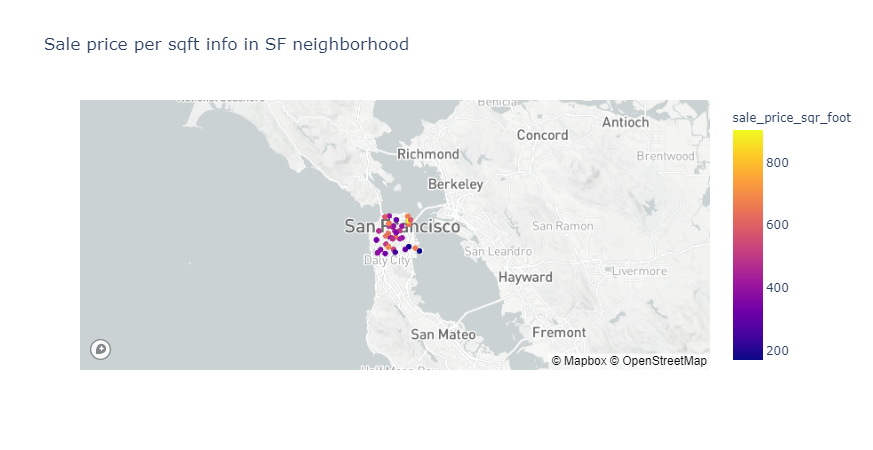

In [249]:
# Create a scatter mapbox to analyze sale price per sqft distribution in SF neighborhood
sale_price_per_sqfts = px.scatter_mapbox(
    joined_data,
    lat="Lat",
    lon="Lon",
    color="sale_price_sqr_foot",
    hover_name="Neighborhood",title="Sale price per sqft info in SF neighborhood"
)
sale_price_per_sqfts.show()